## 📘 Introduction
# 🖐️ Handwritten Digit Recognition using KNN

Ever wondered how our phone reads handwritten digits when scanning documents? In this project, we’ll use a simple but powerful algorithm — **K-Nearest Neighbors (KNN)** — to teach a machine how to recognize digits from images. We’ll be using the popular **Digit Recognizer** dataset, where each digit is represented by pixel values.

Let’s explore the data, visualize some digits, train a KNN model, and make it smart enough to recognize digits on unseen data!


## 🧠 Step 1: Import Libraries

In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visualization
import matplotlib.pyplot as plt

# Warnings
import warnings
warnings.filterwarnings('ignore')


## 🗃️ Step 2: Load and Preview Data

Let’s load the training data and take a quick look at the structure. Each row represents an image of a handwritten digit — with 784 pixel columns (28x28) and one label column.


In [11]:
# Load the training dataset
train_df = pd.read_csv('/content/drive/MyDrive/Dataset/train.csv')

# Show first few rows
train_df.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 👁️ Step 3: First Look at the Digits

Let’s visualize a few of the digits to get a feel for what the model will learn. Each digit is represented as a 28x28 grayscale image.


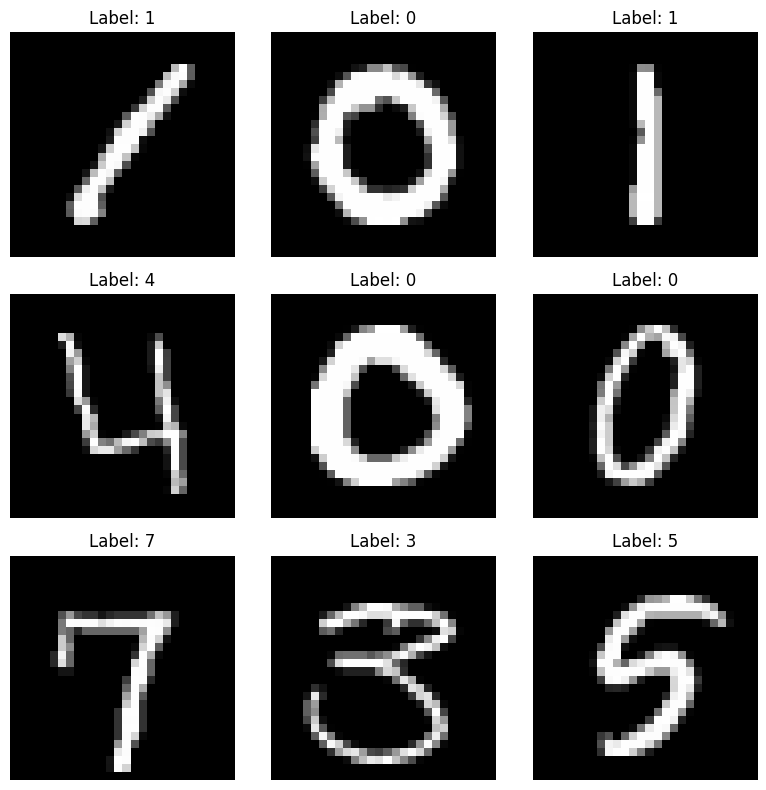

In [3]:
# Function to plot sample digits
def plot_digits(data, labels, num=9):
    plt.figure(figsize=(8, 8))
    for i in range(num):
        img = data.iloc[i].values.reshape(28, 28)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Label: {labels.iloc[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot 9 sample digits
plot_digits(train_df.drop('label', axis=1), train_df['label'])


## 🧪 Step 4: Preparing Data for Training

We’ll split the training dataset into training and validation sets (80/20 split). This helps us evaluate how well our model might perform on unseen data.


In [4]:
# Split features and labels
X = train_df.drop('label', axis=1)
y = train_df['label']

# Normalize the pixel values to 0-1 range
X = X / 255.0

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## 🏋️‍♂️ Step 5: Training the KNN Model

Let’s train the KNN classifier on our training set. KNN doesn’t make assumptions — it simply finds the 'k' most similar instances and votes!


In [5]:
# Initialize the model
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

## 📊 Step 6: Model Evaluation on Validation Set

Let’s see how our model performs on the validation set. We’ll look at accuracy, a classification report, and a confusion matrix.


In [6]:
# Predict on validation set
y_pred = knn.predict(X_val)

# Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"✅ Accuracy Score: {accuracy:.4f}\n")

# Classification Report
print("📄 Classification Report:")
print(classification_report(y_val, y_pred))

✅ Accuracy Score: 0.9667

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       827
           1       0.95      1.00      0.97       937
           2       0.98      0.96      0.97       835
           3       0.96      0.96      0.96       870
           4       0.97      0.96      0.97       814
           5       0.95      0.96      0.96       759
           6       0.98      0.99      0.99       827
           7       0.97      0.97      0.97       880
           8       0.99      0.90      0.94       813
           9       0.95      0.96      0.95       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



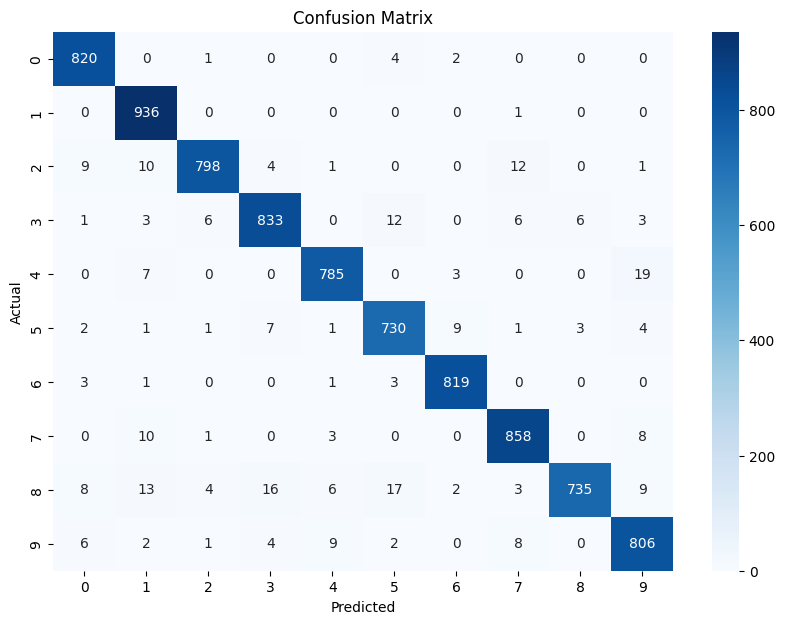

In [7]:
# Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 🧪 Step 7: Predicting on Unseen Test Data

Now we’ll load the separate test dataset (without labels), preprocess it, and predict the digits using our trained KNN model.


In [12]:
# Load test data
test_df = pd.read_csv('/content/drive/MyDrive/Dataset/test.csv')

# Normalize pixel values
test_df = test_df / 255.0

# Predict
test_predictions = knn.predict(test_df)

# Preview predictions
prediction_df = pd.DataFrame({'ImageId': np.arange(1, len(test_predictions)+1), 'Label': test_predictions})
prediction_df.head()


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


## 💾 Step 8: Save Submission File

Let’s save our predictions in the format required for submission or presentation.


In [9]:
# Save predictions to CSV
prediction_df.to_csv('digit_predictions.csv', index=False)
print("📁 'digit_predictions.csv' has been saved!")


📁 'digit_predictions.csv' has been saved!


## 🔍 Step 9: Visualizing Test Set Predictions

Now that we’ve made predictions on the unseen test dataset, let’s take a look at how well our model thinks it's performing! Below are a few randomly selected images from the test set, along with the digit our model predicts for them.


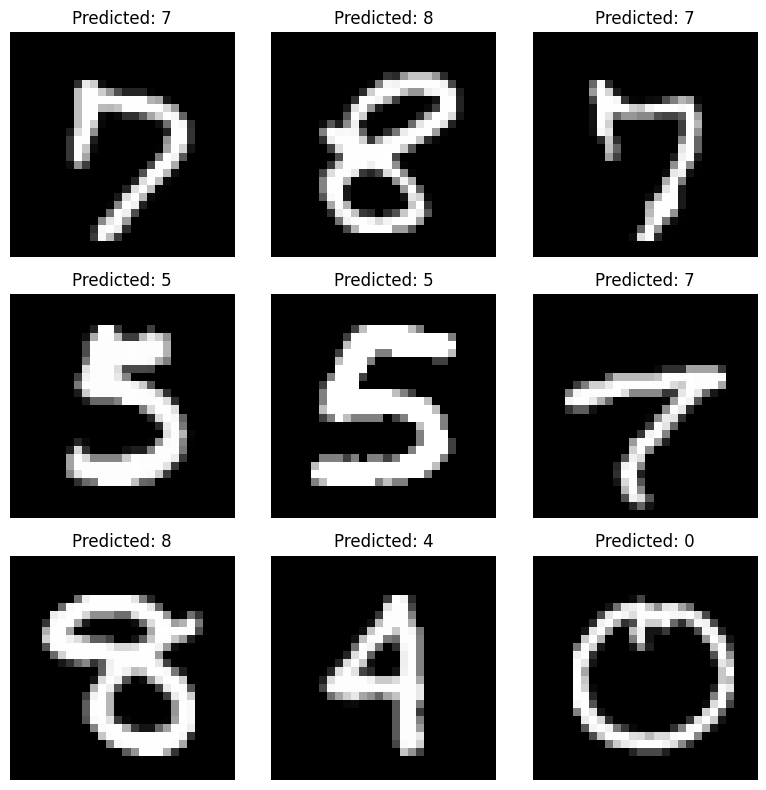

In [10]:
# Plotting a few test images with predicted labels
def visualize_test_predictions(test_data, predictions, num_samples=9):
    plt.figure(figsize=(8, 8))
    for i in range(num_samples):
        index = np.random.randint(0, len(test_data))
        image = test_data.iloc[index].values.reshape(28, 28)
        label = predictions[index]

        plt.subplot(3, 3, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Predicted: {label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the visualization function
visualize_test_predictions(test_df, test_predictions)
